# Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Checking for missing values:

<AxesSubplot:>

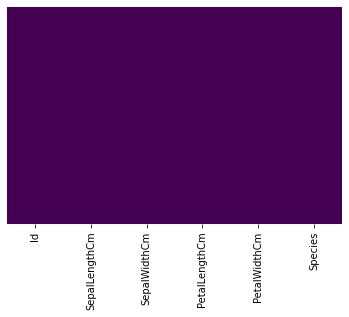

In [4]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

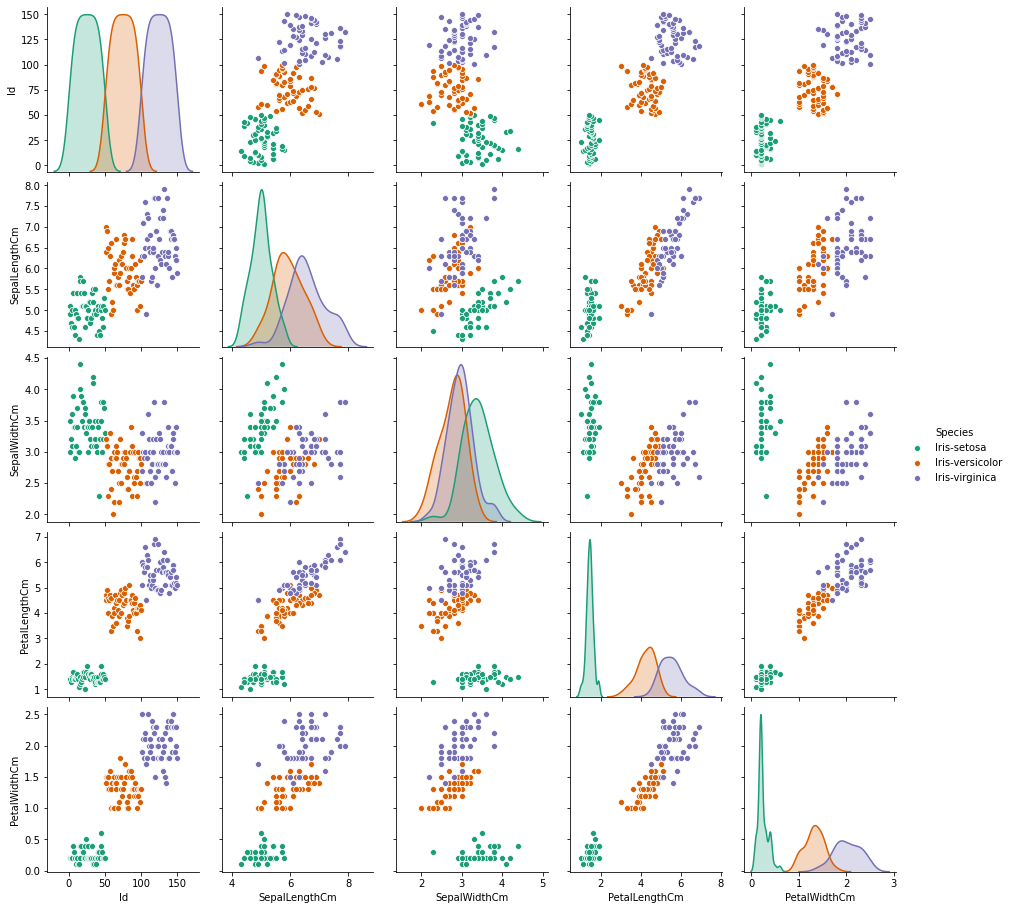

In [5]:
sns.pairplot(df, hue='Species', palette='Dark2')

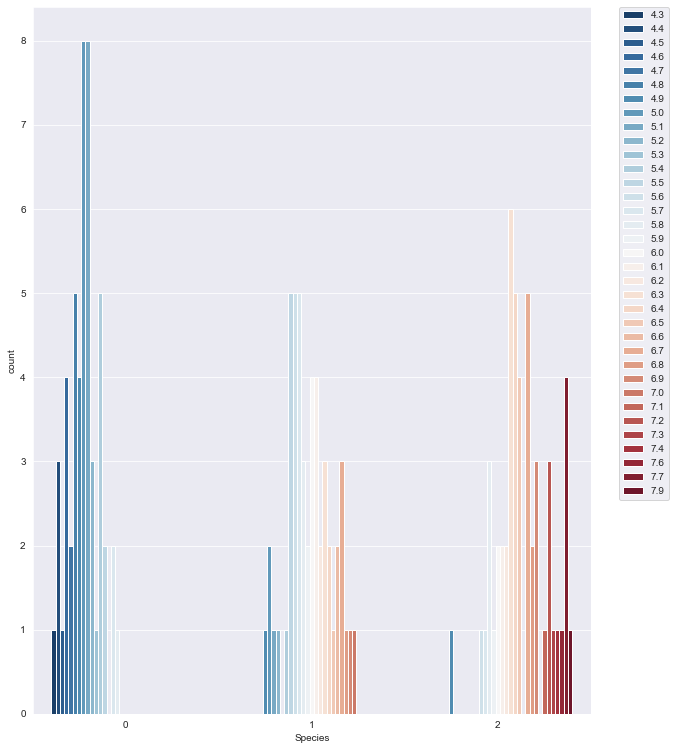

In [33]:
plt.figure(figsize=(10,13))
sns.set_style("darkgrid")
sns.countplot(x='Species',hue='SepalLengthCm', data=df, palette='RdBu_r')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

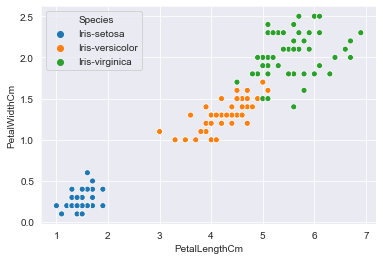

In [7]:
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue='Species')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

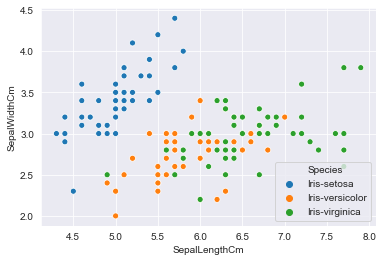

In [8]:
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm", hue='Species')

In [9]:
from sklearn import preprocessing

In [10]:
label_encoder = preprocessing.LabelEncoder()
df['Species']= label_encoder.fit_transform(df['Species'])
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

# Finding the correlations of species with the other columns

In [11]:
corr_matrix = df.corr()
corr_matrix['Species'].sort_values(ascending=False)

Species          1.000000
PetalWidthCm     0.956464
PetalLengthCm    0.949043
Id               0.942830
SepalLengthCm    0.782561
SepalWidthCm    -0.419446
Name: Species, dtype: float64

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [13]:
df.drop(['SepalWidthCm'], axis=1, inplace=True)
df.drop(['Id'], axis=1, inplace=True)

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Species',axis=1), 
                                                    df['Species'], test_size=0.30, 
                                                    random_state=42)

# First, we use the Logistic Regression algorithm

In [17]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
prediction = logmodel.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [20]:
print(confusion_matrix(y_test,prediction))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Using KNN:

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
predicts = knn.predict(X_test)

In [25]:
print(confusion_matrix(y_test, predicts))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [26]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## KNN gives perfect accuracy.

## Now, we try using SVM

In [27]:
from sklearn.svm import SVC

In [28]:
svc = SVC()

In [29]:
svc.fit(X_train, y_train)

SVC()

In [30]:
pred = svc.predict(X_test)

In [31]:
print(confusion_matrix(y_test, pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [32]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Hence we can conclude that all 3 algorithms give us a 100 % accuracy on the dataset. This can be mainly because of the less number of features and the simplicity of the dataset.